In [2]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec
import rebound
import datetime


In [3]:
#date = datetime.datetime(2010, 7, 9, 11, 4)
date=datetime.datetime(2023, 3, 20, 0, 0)
sim = rebound.Simulation()
sim.add("Sun", date=date)
sim.add("Earth", date=date)
sim.add("2003 RM", date=date)
sim.add("139359", date=date)
sim.add("452639", date=date)
sim.add("152667", date=date)
sim.add("2012 UR158", date=date)
sim.add("1998 KY26", date=date)
sim.add("2005 VL1", date=date)
sim.add("2016 NJ33", date=date)
sim.add("2010 VL65", date=date)
sim.add("2010 RF12", date=date)
sim.add("2006 RH120", date=date)
sim.add("2016 GW221", date=date)
sim.add("2013 BA74", date=date)
sim.add("2013 XY20", date=date)
sim.add("Jupiter", date=date)



Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for '2003 RM'... 
Found: 523599 (2003 RM) 
Searching NASA Horizons for '139359'... 


/Users/darrylseligman/opt/anaconda3/lib/python3.9/site-packages/rebound/horizons.py:168: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: 139359 (2001 ME1) 
Searching NASA Horizons for '452639'... 
Found: 452639 (2005 UY6) 
Searching NASA Horizons for '152667'... 
Found: 152667 (1998 FR11) 
Searching NASA Horizons for '2012 UR158'... 
Found: (2012 UR158) 
Searching NASA Horizons for '1998 KY26'... 
Found: (1998 KY26) 
Searching NASA Horizons for '2005 VL1'... 
Found: (2005 VL1) 
Searching NASA Horizons for '2016 NJ33'... 
Found: (2016 NJ33) 
Searching NASA Horizons for '2010 VL65'... 
Found: (2010 VL65) 
Searching NASA Horizons for '2010 RF12'... 
Found: (2010 RF12) 
Searching NASA Horizons for '2006 RH120'... 
Found: (2006 RH120) 
Searching NASA Horizons for '2016 GW221'... 
Found: (2016 GW221) 
Searching NASA Horizons for '2013 BA74'... 
Found: (2013 BA74) 
Searching NASA Horizons for '2013 XY20'... 
Found: (2013 XY20) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [4]:
sim.particles[16].m=0

In [5]:
# integrate
Noutputs = 1500
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,15.*year, Noutputs)

numobjects=21-5
x = np.zeros((numobjects,Noutputs))
y = np.zeros((numobjects,Noutputs))
z = np.zeros((numobjects,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


sim.dt = sim.particles[1].P/60. # small fraction of Mercury's period
#sim.integrator = "mercurius"  

for i,time in enumerate(times):
    sim.integrate(time)
    for jk in np.arange(numobjects):
        #print(jk)
        x[int(jk)][i] = ps[int(jk)+1].x   # This stores the data which allows us to plot it later
        y[int(jk)][i] = ps[int(jk)+1].y
        z[int(jk)][i] = ps[int(jk)+1].z
     

In [65]:
def plot_inner(axs,fs2=8,linewidth=1):
    
    alpha1=0.7
    #inner dark comets
    numend=140
    #linewidth=1.5
    #ky26
    jk=6
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',
             lw=linewidth,alpha=alpha1, zorder=0, label='Inner dark comets')#,#z[0])    
            #axs.plot(x[jk][0],y[jk][0],'o',markeredgecolor='#a5a5a5', ms=14, color='none',
             #markeredgewidth=2, zorder=0)

    #2005 VL1
    jk=7
    numend=90
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)#, label='Inner Dark Comets')
    #2016 NJ33
    jk=8
    numend=152
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)

    #2010 VL65
    jk=9
    numend=112
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)


    #2010 RF12
    jk=10
    numend=111
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)


    #2006 RH120
    jk=11
    numend=106
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)


    #2016 GW221
    jk=12
    numend=76
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)

    #2013 BA74
    jk=13
    numend=233
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)

    #2013 XY20

    jk=14
    numend=122
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)



    #earth
    numend=100
    jk=0
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#0077b6',lw=linewidth,zorder=2)#,#z[0])



    idx = 0
    axs.plot(x[jk][idx],y[jk][idx], 'o', markeredgecolor='#0077b6', ms=8, color='w',
             markeredgewidth=linewidth, zorder=10)
    axs.plot(x[jk][idx],y[jk][idx]+0.0009,  '+', color='#0077b6', ms=8, markeredgewidth=linewidth,
             zorder=11)


    axs.plot(0, 0, 'o', markeredgecolor='#ffaa00', ms=8, color='w', markeredgewidth=linewidth)
    axs.plot(0, 0, 'o', color='#ffaa00', ms=1)

    axs.set_aspect('equal')
    #axs.set_xlim(-4.65,2.8)
    axs.set_xlim(-1.45,2.42)
    axs.set_ylim(-1.96,1.54)

    axs.axis('off')
    #axs.grid()


    scale = -0.3
    axs.axhline(-1.563, 0.418+scale, 0.670+scale,color='k',lw=1)
    scale = -0.4

    axs.axvline(-1,scale+0.5,scale+0.53,color='black',lw=1)#,#alpha=0.3)
    axs.axvline(0,scale+0.5,scale+0.53,color='black',lw=1)#,#alpha=0.3)
    axs.annotate('1 au',xy=(-0.72,-1.75),rotation=0,fontsize=fs2*1.5)

    jk=14
    numend2=140
    #axs.plot(x[jk][0:numend2:1],y[jk][0:numend2:1],color='black',lw=linewidth)
    fs=fs2
    axs.annotate(r'1998 KY$_{26}$',xy=(-.99,1),rotation=0,fontsize=fs)
    axs.annotate(r'2016 GW$_{221}$',xy=(-0.5,0.4),rotation=0,fontsize=fs, style='italic')

    axs.annotate(r'2013 BA$_{74}$',xy=(1.4,-1.4),rotation=0,fontsize=fs, style='italic')


    axs.annotate(r'2013 XY$_{20}$',xy=(1.1,-0.7),rotation=0,fontsize=fs, style='italic')

    #plt.savefig('darkcomet_orbits_zoomedv2', rasterize=True, bbox_inches='tight', dpi=300)
    return None
def plot_outer(axs,fs2=8,linewidth=1):
    
    #linewidth=2

    numend=600
    numend2003rm=530
    numstart2003rm=30
    #outer dark comets
    for jk in np.arange(1,6):
        #print(jk)
        if jk==1:
            axs.plot(x[jk][numstart2003rm:numend2003rm:1],y[jk][numstart2003rm:numend2003rm:1],color='#ff7477',lw=linewidth,label='Outer dark comets')#,#z[0])
        else:
            axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#ff7477',lw=linewidth)
    #inner dark comets
    alpha1=0.5
    #inner dark comets
    numend=140
    #linewidth=1.5
    #ky26
    jk=6
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0, label='Inner dark comets')#,#z[0])    
            #axs.plot(x[jk][0],y[jk][0],'o',markeredgecolor='#a5a5a5', ms=14, color='none',
             #markeredgewidth=2, zorder=0)

    #2005 VL1
    jk=7
    numend=90

    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)#, label='Inner Dark Comets')
    #2016 NJ33
    jk=8
    numend=152
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)

    #2010 VL65
    jk=9
    numend=112
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)


    #2010 RF12
    jk=10
    numend=111
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)


    #2006 RH120
    jk=11
    numend=106
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)


    #2016 GW221
    jk=12
    numend=76
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)

    #2013 BA74
    jk=13
    numend=233
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)

    #2013 XY20

    jk=14
    numend=122
    axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#a5a5a5',lw=linewidth,alpha=alpha1, zorder=0)



    #earth
    for jk in np.arange(1):
        #print(jk)
        axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='#0077b6',lw=linewidth)#,#z[0])

    #jupiter
    axs.plot(x[numobjects-1],y[numobjects-1],color='darkred',lw=linewidth,alpha=0.99, zorder=0)
    axs.plot(x[numobjects-1][0],y[numobjects-1][0], 'o', markeredgecolor='darkred', ms=8, color='none',
             markeredgewidth=linewidth, zorder=0)
    sizer=3
    axs.plot(x[numobjects-1][217],y[numobjects-1][217], '<', markeredgecolor='darkred', ms=sizer, color='darkred',
             markeredgewidth=linewidth, zorder=0)

    axs.plot(x[numobjects-1][528],y[numobjects-1][528], 'v', markeredgecolor='darkred', ms=sizer, color='darkred',
             markeredgewidth=linewidth, zorder=0)



    axs.plot(x[numobjects-1][845],y[numobjects-1][845], '>', markeredgecolor='darkred', ms=sizer, color='darkred',
             markeredgewidth=linewidth, zorder=0)

    axs.plot(x[numobjects-1][1128],y[numobjects-1][1128], '^', markeredgecolor='darkred', ms=sizer, color='darkred',
             markeredgewidth=linewidth, zorder=0)



    #axs.plot(x[numobjects-1][0],y[numobjects-1][0]+0.0009,  '+', color='darkred', ms=13, markeredgewidth=2,
     #        zorder=1)



    idx = 0
    axs.plot(x[jk][idx],y[jk][idx], 'o', markeredgecolor='#0077b6', ms=8, color='w',
             markeredgewidth=linewidth, zorder=10)
    axs.plot(x[jk][idx],y[jk][idx]+0.0009,  '+', color='#0077b6', ms=8, markeredgewidth=linewidth,
             zorder=11)



    axs.plot(0, 0, 'o', markeredgecolor='#ffaa00', ms=8, color='w', markeredgewidth=linewidth)
    axs.plot(0, 0, 'o', color='#ffaa00', ms=2)
    #print(x[0])
    axs.set_aspect('equal')

    axs.set_xlabel('X [au]')
    axs.set_ylabel('Y [au]')
    #axs.set_xlim(-4.65,2.8)
    axs.set_xlim(-5.62,5.1)
    axs.set_ylim(-5.41,5.26)

    axs.axis('off')
    #axs.grid()
    axs.legend(fancybox=True, framealpha=1, 
               shadow=False, borderpad=-1.0,bbox_to_anchor=(1.25,.01),#bbox_to_anchor=(.85,.2),
               frameon=False, loc='lower right', ncol=1,prop={'size': 8},facecolor='none')
    #axs.axvline(-1.8,0.5,0.62,color='darkgrey',lw=3)#,#alpha=0.3)
    #axs.annotate('1 AU',xy=(-2.25,0.1),rotation=90)

    scale = -0.12
    axs.axhline(-3.13, 0.553+scale, 0.643+scale,color='k',lw=1)
    scale = -0.3

    axs.axvline(-1,scale+0.5,scale+0.53,color='black',lw=1)#,#alpha=0.3)
    axs.axvline(0,scale+0.5,scale+0.53,color='black',lw=1)#,#alpha=0.3)
    axs.annotate('1 au',xy=(-1.1,-3.9),rotation=0)

    fs=fs2
    axs.annotate('Jupiter',xy=(4.,3.5),rotation=0,fontsize=fs)
    axs.annotate('2003 RM',xy=(-4.9,1.8),rotation=0,fontsize=fs)
    axs.annotate(r'2001 ME$_1$',xy=(-4.95,-0.2),rotation=0,fontsize=fs, style='italic')
    axs.annotate(r'2005 UY$_6$',xy=(3.,-2.),rotation=0,fontsize=fs, style='italic')
    axs.annotate(r'1998 FR$_{11}$',xy=(.7,3.78),rotation=0,fontsize=fs, style='italic')
    axs.annotate(r'2012 UR$_{158}$',xy=(3,0.5),rotation=0,fontsize=fs, style='italic')


    jk=6
    #axs.plot(x[jk][0:numend:1],y[jk][0:numend:1],color='black',lw=linewidth)


    return None



/var/folders/tf/hszq26_12053sq83srkrc3m40000gn/T/ipykernel_43795/1029461480.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Dark_Comet_Orbits.pdf',
/var/folders/tf/hszq26_12053sq83srkrc3m40000gn/T/ipykernel_43795/1029461480.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Dark_Comet_Orbits.pdf',
/Users/darrylseligman/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


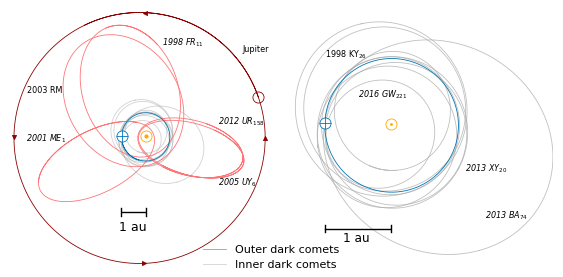

In [66]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=( 17.8*cm,12*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.25, 'wspace': 0.1})#,projection='3d')
plot_inner(axs[1],fs2=5.8,linewidth=0.6)
plot_outer(axs[0],fs2=5.8,linewidth=0.6)
plt.savefig('Dark_Comet_Orbits.pdf',
            format='pdf',bbox_inches='tight', dpi=600)

